# First, let's take a look at the Basel Problem


### What's the Basel problem I hear you ask?

Well imagine all the numbers up to ... well infinity?

Square them, and then inverse them.


$1+\frac{1}{2^2} + \frac{1}{3^2} + \frac{1}{4^2} + \frac{1}{5^2} + ... $ 

Well, imagine if the sum of all that, all the way to infinity (and naturally beyond if Buzz is able to find that) was:

$\pi^2 / 6$

#### Mad? 
#### Doesn't even make sense?
#### Going to stop reading?

Well when dear Leo Euler showed it to the world, the world thought very much the same. Fortunately for him, us and modern society, they kept reading...


Annoyingly to understand the Basel Series, you'll need to understand something called the Taylor Series. Which is a lot less fun, but also important if you like triangles.

In [1]:
from math import pi,sin,factorial

#### Now remember that sine is the ratio of the length of the side that is opposite that angle to the length of the longest side of the triangle (the hypotenuse)

https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwia1tOniMfkAhWByoUKHYYEBTQQjRx6BAgBEAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FSine&psig=AOvVaw0W8HTgs6j3PsiSifF4V7ZS&ust=1568232728636529


## As a result, it's linked to a π via the circle connotation, but if you want to get a decent visulisation it's...

In [2]:
import numpy as np

import matplotlib.pyplot as plt

 

# Get x values of the sine wave
time = np.arange(0, 10, 0.1);

 

# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)

 

# Give a title for the sine wave plot
plt.title('Sine wave')

 

# Give x and y axis labels for the sine wave plot
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')

plt.grid(True, which='both')

plt.axhline(y=0, color='k')

### So from above you can see that the graph is periodic (swings back and forth... amirite?) and that it alternates between 1 and -1.

But what about those times where x = 0?

In [3]:
for i in np.linspace(0,4,20):
    print(i,"->",sin(i))


0.0 -> 0.0
0.21052631578947367 -> 0.20897462406278547
0.42105263157894735 -> 0.40872137322898616
0.631578947368421 -> 0.5904198559291864
0.8421052631578947 -> 0.7460466536513234
1.0526315789473684 -> 0.8687296180358695
1.263157894736842 -> 0.9530513303299016
1.4736842105263157 -> 0.995288323076044
1.6842105263157894 -> 0.9935755005153384
1.894736842105263 -> 0.9479884972487855
2.1052631578947367 -> 0.860540338374244
2.3157894736842106 -> 0.7350925485799386
2.526315789473684 -> 0.5771846354279316
2.7368421052631575 -> 0.3937894764830594
2.9473684210526314 -> 0.193005411871413
3.1578947368421053 -> -0.016301361193955085
3.3684210526315788 -> -0.22488830082300723
3.578947368421052 -> -0.42354465143912384
3.789473684210526 -> -0.6034981711535158
4.0 -> -0.7568024953079282


#### You can see it's between 2.9473684210526314 and 3.1578947368421053.

But let's do...

In [4]:
for i in np.linspace(3,3.2,10):
    print(i,"->",sin(i))


3.0 -> 0.1411200080598672
3.022222222222222 -> 0.1190871424307064
3.0444444444444443 -> 0.0969954707562093
3.066666666666667 -> 0.0748559020549272
3.088888888888889 -> 0.052679368997292045
3.111111111111111 -> 0.030476822506986412
3.1333333333333333 -> 0.008259226353304283
3.155555555555556 -> -0.013962448262834113
3.177777777777778 -> -0.03617722812653456
3.2 -> -0.058374143427580086


Well, we can get it bang on surely?

In [5]:
0 == round(sin(pi),15)

True

Just don't do...

In [6]:
0 == round(sin(pi),16)

False

### But anyway, because of how right angle triangles relate to circles, when $sin(x)$ == 0, it can be π, 2π, 3π or even -π...

The point that matters is that is how the sine ratio works with 0. 0 is terribly important if you want to solve functions as it's a great indicator of what the other coefficients are when everything else is minimised.


Now that rounding to 15 or 16 decimal places is because there's a slight discrepancy of the number of figures the sin value from the `math` library is I'm using. So what is $sin(x)$ really?

$sin(x) = x -\frac{x^3}{3!} + \frac{x^5}{5!} + \frac{x^7}{7!} + \frac{x^9}{9!} + ...  = 0$ 


That `!` is the same a running our `factorial` function from Chapter 2.

Now in the `math.sin` function, that calculation above only goes to 15 places. 


But what this also means is:

$sin(x) = (x-0)(x-\pi)(x+\pi)(x-2\pi)(x+2π)(x-3\pi)...$

Because for every iteration of π, `sin(nπ)` (with n being a whole number) will be 0.


Now what this will also mean is because:

$(x-\pi)(x+\pi) == (x^2 - \pi^2)$

$(x-2\pi)(x+2\pi) == (x^2 - 4\pi^2)$

$(x-3\pi)(x+3\pi) == (x^2-9\pi^2)$

(...hold on that's where those that's where those square numbers are coming in...)


### It also means that:

$sin(x) = (x^2-\pi^2)(x^2-4\pi^2)(x^2-9\pi^2)...$


What if we just divide the right side of that equation by $x^2$ within each bracket?


$sin(x) = (1 - \frac{x^2}{π^2})(1 - \frac{x^2}{4\pi^2})(1 - \frac{x^2}{9\pi^2})...$


Then divide both sides by `x`...


$\frac{sin(x)}{x} = (1 - \frac{x^2}{\pi^2})(1 - \frac{x^2}{4\pi^2})(1 - \frac{x^2}{9\pi^2})...$


#### And break that down a little further... 

$\frac{sin(x)}{x} = 1 - \frac{x^2}{\pi^2}  - \frac{x^2}{4\pi^2} - \frac{x^2}{9\pi^2}...$

$\frac{sin(x)}{x} = 1 - x^2 (\frac{1}{\pi^2}  - \frac{1}{4\pi^2} - \frac{1}{9\pi^2}...)$

### OK still with me? It means let's take that first calculation for `sin` from the top:

$sin(x) = x -\frac{x^3}{3!} + \frac{x^5}{5!} + \frac{x^7}{7!} + \frac{x^9}{9!} + ...  = 0$ 

Divide the whole thing by `x`:

$\frac{sin(x)}{x} = 1 -\frac{x^2}{3!} + \frac{x^4}{5!} + \frac{x^6}{7!} + \frac{x^8}{9!} + ...  = 0$ 


It also means...

$1 -\frac{x^2}{3!} + \frac{x^4}{5!} + \frac{x^6}{7!} + \frac{x^8}{9!} + ...  = 1 - x^2 (\frac{1}{\pi^2}  - \frac{1}{4\pi^2} - \frac{1}{9\pi^2}...)$


### Now... (almost there I promise), you see that both sides have an $x^2$ immediately after the `1 - ...` it means that the coefficients must be the same for both functions.

In [7]:
factorial(3)

6

It means


$ 0-\frac{1}{6} = (\frac{1}{\pi^2}  - \frac{1}{4\pi^2} - \frac{1}{9\pi^2}...)$

Which is 


$\frac{1}{6} = \frac{1}{\pi^2}(1+\frac{1}{4}+\frac{1}{9}...)$


# WHICH MEANS

$\frac{\pi}{6} = 1+\frac{1}{4}+\frac{1}{9}...$

and...

$\frac{\pi}{6} = 1+\frac{1}{2^2}+\frac{1}{3^2}+\frac{1}{4^2}+\frac{1}{5^2}...$

# BOOM!!!




lovely...




## OK secondly... (oh yes we have a lot more to do), there's some basic axioms we've got to get down.

$x^m  \times x^n = x^{m+n} $

Should be pretty simple




In [8]:
12**3

1728

In [9]:
12**5

248832

In [10]:
12**3 * 12**5

429981696

In [11]:
12**8 == 12**3 * 12**5

True

As a consequence, this also means 

$x^m \div x^n = x^{m-n} $

$(x^m)^n = x^{m  \times  n} $

You can test that out yourself.


There's also:

$x^0 => 1$ Any positive number to the power of `0` will be `1`


In [12]:
np.random.randint(10)**0

1

In [13]:
for i in range(1,11):
    x = np.random.randint(i*1000)
    print(x,x**0)

288 1
409 1
446 1
3533 1
1469 1
3146 1
4510 1
402 1
4910 1
5337 1


## Doesn't matter what the number could possibly be, as long as it's a positive integer, the zero power rule will always come to 1.


### A couple more:

$ x^{-n} =\frac{1}{x^n} $



In [14]:
x = np.random.randint(100)
n = np.random.randint(100)

x**-n == 1/(x**n)



True

$ x^{\frac{m}{n}}$ is the nth root of $x^m $


You'll have to bear with me on this evaluation. Essentially `nth` root of x is `x^(1/n)`. In general, you can compute the nth root of x as.... 

In [15]:
x = np.random.randint(100)
m = np.random.randint(100)
n = np.random.randint(100)


x**(m/n) == x**(m * (1/float(n)))

True

$ (x \times y)^n = x^n \times y^n $ 

In [16]:
x = np.random.randint(100)
y = np.random.randint(100)
n = np.random.randint(100)


(x * y)**n == x**n * y**n

True

## Beautiful. Now what about irrational numbers.

### Well they are a little tougher to explain. But let's take the $ \sqrt{2}$

### Now the square root of two is easy to calculate....

In [17]:
import math

math.sqrt(2)

1.4142135623730951

### But what is harder is to find, is the true value for any irrational number. 

So let's take the following fractions:

## $\frac{1}{1}, \frac{3}{2}, \frac{7}{5}, \frac{17}{12}, \frac{41}{29}, \frac{99}{70}, \frac{239}{169}, \frac{577}{408}, \frac{1393}{985}, \frac{3363}{2378}$


Each fraction is built from the one before by a simple rule:

## Add the top and bottom to get a new bottom (denominator), add the top and multiply the twice to get the top number (numerator). 

In [18]:
def squared_2_sequence(sequence_size,print_arg=False):
    for i in range(1,sequence_size+1):
        if i == 1:
            numerators = [1]
            denominators = [1]
        else:
            new_d = numerators[-1] + denominators[-1]
            new_n = numerators[-1] + denominators[-1]*2
            numerators.append(new_n)
            denominators.append(new_d)

    if print_arg==True:
        for seq in zip(numerators,denominators):
            print(seq)
    
    return list(zip(numerators,denominators))


list_of_fractions =  squared_2_sequence(10,print_arg=True)

(1, 1)
(3, 2)
(7, 5)
(17, 12)
(41, 29)
(99, 70)
(239, 169)
(577, 408)
(1393, 985)
(3363, 2378)


## Now as we iterate through each of these calculations, we can get closer and closer to a given number for the Squared root of 2

In [19]:
def sum_list_of_fractions(list_of_fractions):
    return [x[0] / x[1] for x in list_of_fractions]

sum_list_of_fractions(list_of_fractions)

[1.0,
 1.5,
 1.4,
 1.4166666666666667,
 1.4137931034482758,
 1.4142857142857144,
 1.4142011834319526,
 1.4142156862745099,
 1.4142131979695431,
 1.4142136248948696]

## And if I run the function to calculate the figures 22 times, I get the exact value I need

In [20]:
sum_list_of_fractions(squared_2_sequence(22,print_arg=True))

(1, 1)
(3, 2)
(7, 5)
(17, 12)
(41, 29)
(99, 70)
(239, 169)
(577, 408)
(1393, 985)
(3363, 2378)
(8119, 5741)
(19601, 13860)
(47321, 33461)
(114243, 80782)
(275807, 195025)
(665857, 470832)
(1607521, 1136689)
(3880899, 2744210)
(9369319, 6625109)
(22619537, 15994428)
(54608393, 38613965)
(131836323, 93222358)


[1.0,
 1.5,
 1.4,
 1.4166666666666667,
 1.4137931034482758,
 1.4142857142857144,
 1.4142011834319526,
 1.4142156862745099,
 1.4142131979695431,
 1.4142136248948696,
 1.4142135516460548,
 1.4142135642135643,
 1.4142135620573204,
 1.4142135624272734,
 1.4142135623637995,
 1.4142135623746899,
 1.4142135623728214,
 1.414213562373142,
 1.414213562373087,
 1.4142135623730965,
 1.4142135623730947,
 1.4142135623730951]

In [21]:
l_f = sum_list_of_fractions(squared_2_sequence(22))

l_f[-1] == math.sqrt(2)

True

## But what we can also do is given the power rule: $ x^{\frac{m}{n}}$ is the nth root of $x^m $,  we can convert that meaning into any of those fractions.

### So for example, $ 12^{\frac{3}{2}} == (\sqrt{12})^3$

(...excuse the rounding)


In [22]:
round(12**(3/2),12) == round(math.sqrt(12)**3,12)

True

### And, $ 12^{\frac{7}{5}} == (^7\sqrt{12})^5$ etc, etc...

## So what this also allows for is the calculation of $12^{\sqrt(2)}$

In [23]:
sqrt_value_for_2_from_fractions = sum_list_of_fractions(squared_2_sequence(22))[-1]


sqrt_value_for_2_from_fractions

1.4142135623730951

In [24]:
math.sqrt(2)

1.4142135623730951

In [25]:
12**sqrt_value_for_2_from_fractions == 12**(math.sqrt(2))

True

## Now it doesn't really matter what positive number we replace 12 with. Raise that number to an power, whether it's positive, negative, fractional or irrational, they will always obey the numbers above

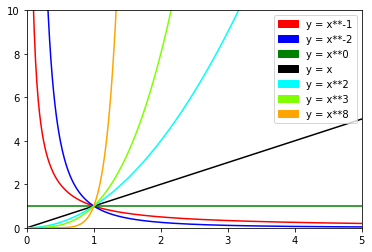

<Figure size 2160x1440 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = np.arange(-1, 5 + 1,step=0.01)
minus_1 = [1/(item**1) for item in x]
minus_square = [1/(item**2) for item in x]
zero_power = [item**0 for item in x]
two_power = [item**2 for item in x]
three_power = [item**3 for item in x]
eight_power = [item**8 for item in x]

plt.plot(x, minus_1, 'r')
plt.plot(x, minus_square, 'b')
plt.plot(x, zero_power, 'g')
plt.plot(x, x, 'black')
plt.plot(x, two_power, 'aqua')
plt.plot(x, three_power, 'chartreuse')
plt.plot(x, eight_power, 'orange')

axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([0,10])

plt.legend(handles=[
    mpatches.Patch(color='red', label='y = x**-1'),
    mpatches.Patch(color='b', label='y = x**-2'),
    mpatches.Patch(color='g', label='y = x**0'),
    mpatches.Patch(color='black', label='y = x'),
    mpatches.Patch(color='aqua', label='y = x**2'),
    mpatches.Patch(color='chartreuse', label='y = x**3'),
    mpatches.Patch(color='orange', label='y = x**8'),
])

plt.figure(figsize=(30,20))

plt.show()

In [27]:
np.arange(1,6)

array([1, 2, 3, 4, 5])

In [28]:
2**-1

0.5